In [1]:
import pandas as pd
import os

In [3]:
data = pd.read_csv('Border_Crossing_Entry_Data.csv')
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


# Filter data by state

In [4]:
data = data.dropna(how='any')

In [5]:
data_TX = data.loc[(data['State']=='TX')]
data_TX.to_csv('Data TX.csv')
data_TX.reset_index()

,index,Port Name,State,Port Code,Border,Date,Measure,Value
0,49,Boquillas,TX,2410,US-Mexico Border,2/1/2020 00:00,Pedestrians,3036
1,66,Brownsville,TX,2301,US-Mexico Border,2/1/2020 00:00,Bus Passengers,3072
2,67,Brownsville,TX,2301,US-Mexico Border,2/1/2020 00:00,Buses,469
3,68,Brownsville,TX,2301,US-Mexico Border,2/1/2020 00:00,Pedestrians,232880
4,69,Brownsville,TX,2301,US-Mexico Border,2/1/2020 00:00,Personal Vehicle Passengers,638585
...,...,...,...,...,...,...,...,...
36753,355449,Brownsville,TX,2301,US-Mexico Border,1/1/1996 00:00,Trucks,19168
36754,355456,Hidalgo,TX,2305,US-Mexico Border,1/1/1996 00:00,Personal Vehicles,487872
36755,355465,Progreso,TX,2309,US-Mexico Border,1/1/1996 00:00,Rail Containers Full,0
36756,355484,Hidalgo,TX,2305,US-Mexico Border,1/1/1996 00:00,Rail Containers Empty,0


In [6]:
data_AK = data.loc[(data['State']=='AK')]
data_AK.to_csv('Data AK')
data_AK.reset_index()

,index,Port Name,State,Port Code,Border,Date,Measure,Value
0,0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545
...,...,...,...,...,...,...,...,...
11782,355145,Skagway,AK,3103,US-Canada Border,1/1/1996 00:00,Rail Containers Empty,0
11783,355185,Dalton Cache,AK,3106,US-Canada Border,1/1/1996 00:00,Personal Vehicles,620
11784,355262,Dalton Cache,AK,3106,US-Canada Border,1/1/1996 00:00,Bus Passengers,212
11785,355407,Alcan,AK,3104,US-Canada Border,1/1/1996 00:00,Rail Containers Empty,0


In [7]:
data_CA = data.loc[(data['State']=='CA')]
data_CA.to_csv('Data CA.csv')
data_CA.reset_index()

,index,Port Name,State,Port Code,Border,Date,Measure,Value
0,18,Andrade,CA,2502,US-Mexico Border,2/1/2020 00:00,Pedestrians,115655
1,19,Andrade,CA,2502,US-Mexico Border,2/1/2020 00:00,Personal Vehicle Passengers,82972
2,20,Andrade,CA,2502,US-Mexico Border,2/1/2020 00:00,Personal Vehicles,44277
3,101,Calexico,CA,2503,US-Mexico Border,2/1/2020 00:00,Pedestrians,280949
4,102,Calexico,CA,2503,US-Mexico Border,2/1/2020 00:00,Personal Vehicle Passengers,678645
...,...,...,...,...,...,...,...,...
19548,355444,San Ysidro,CA,2504,US-Mexico Border,1/1/1996 00:00,Truck Containers Full,0
19549,355459,Tecate,CA,2505,US-Mexico Border,1/1/1996 00:00,Truck Containers Empty,1414
19550,355483,Andrade,CA,2502,US-Mexico Border,1/1/1996 00:00,Trains,0
19551,355486,San Ysidro,CA,2504,US-Mexico Border,1/1/1996 00:00,Rail Containers Full,0


In [8]:
cacross = data_CA['Value'].sum()
cacross

2602572970

In [9]:
txcross= data_TX['Value'].sum()
txcross

3747879529

In [10]:
results = data.groupby('State').sum()

Text(0, 0.5, 'Number of people crossing (Billions)')

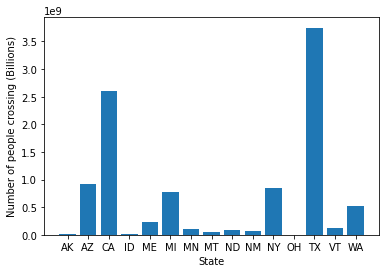

In [11]:
import matplotlib.pyplot as plt

states = [state for state, df in data.groupby('State')]

plt.bar(states, results['Value'])
plt.xlabel('State')
plt.ylabel('Number of people crossing (Billions)')

# Most crossed borders in Texas of all time

In [12]:
results_tx = data_TX.groupby('Port Name').sum()
results_tx

,Port Code,Value
Port Name,,
Boquillas,629010,71870
Brownsville,7908537,533360410
Del Rio,7430856,138750369
Eagle Pass,7915411,264645727
El Paso,8354156,1186748989
Hidalgo,7624940,583725539
Laredo,7918848,676914805
Presidio,7949124,57434263
Progreso,7437289,115017835


Text(0, 0.5, 'People crossing (Billions)')

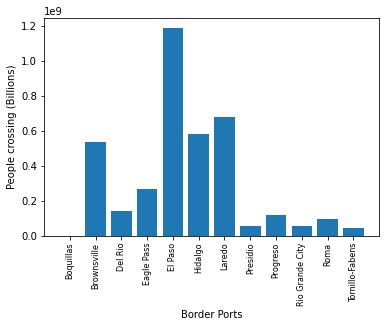

In [13]:
import matplotlib.pyplot as plt

cities = [city for city, df in data_TX.groupby('Port Name')]

plt.bar(cities,results_tx['Value'])
plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel('Border Ports')
plt.ylabel('People crossing (Billions)')